In [390]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

# Differentiate a Logsitic Function

In [2]:
def sum_logistic(x):
    return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499357]


In [3]:
def poly(x,y):
    return jnp.sum(x*x + x*y + x*x*y)

In [4]:
x = jnp.arange(-5,5,dtype = float)
y = jnp.arange(-5,5,dtype = float)

In [5]:
derivative_poly = grad(poly)

In [6]:
derivative_poly(x,y)

DeviceArray([35., 20.,  9.,  2., -1.,  0.,  5., 14., 27., 44.], dtype=float32)

## Some scikit-learn blobs

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0,cluster_std=0.25)

In [15]:
X.shape

(100, 2)

In [16]:
y.shape

(100,)

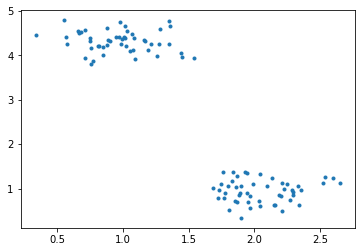

In [392]:
plt.plot(X[:,0],X[:,1],'.')

## Make a Blob Centroid Loss Function

In [398]:
def blobLoss(centroidX,centroidY):
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(jnp.subtract(X[:,[0]], centroidX)), jnp.square(jnp.subtract(X[:,[1]], centroidY)))))
    # Add the squared distances between each data point and the candidate centroid across both X and Y dimensions

In [399]:
blobLoss(0.5,1.5)
# This is the raw value of the loss

DeviceArray(226.62599, dtype=float32)

In [400]:
blobLossGrad = grad(blobLoss)

In [402]:
blobLossGrad(0.5,1.5)
# This is _gradient_ of the loss

DeviceArray(-54.789276, dtype=float32, weak_type=True)

## Make a blob loss function that takes a 2D Grid

In [347]:
def blobLossGrid(centroid):
    
    diffX = jnp.subtract(X[:,[0]], centroid[0])
    diffY = jnp.subtract(X[:,[1]], centroid[1])
    # Calculate distance between each point and candidate centroid in X and Y
    
    finalSum = jnp.sum(jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))))
    # Add squared distances in X and Y for each point 
    # and sum to get total loss for candidate centroid
    
    return finalSum
    # Each candidate centroid will return a gradient in X and Y

## Make a 2-D grid of centroids and flatten to 1-D

In [275]:
xy = jnp.mgrid[0.:5.:0.1, 0.:5.:0.1].reshape(2,-1).T
# Create a 2-D grid of candidates and flatten to 1-D

In [348]:
blobLossGridGrad = vmap(grad(blobLossGrid))
# Take gradient of loss function and vmap to accept a vector of input candidates

In [349]:
grads = blobLossGridGrad(xy)

In [350]:
grads
# Each returned value gives gradient wrt X and Y for each candidate centroid

DeviceArray([[-56.100132, -69.46554 ],
             [-57.145206, -67.53551 ],
             [-58.14829 , -65.50505 ],
             ...,
             [ 79.851326,  44.680088],
             [ 79.20886 ,  46.306152],
             [ 78.5485  ,  47.90195 ]], dtype=float32)

In [355]:
jnp.min(jnp.sum(jnp.abs(grads),axis = 1))
# This is the minimum total gradient across all candidates

DeviceArray(0.59252656, dtype=float32)

In [356]:
jnp.argmin(jnp.sum(jnp.abs(grads),axis = 1))
# This is the position of the minimum total gradient in candidate array

DeviceArray(730, dtype=int32)

In [357]:
minCentroid = xy[jnp.argmin(jnp.sum(jnp.abs(grads),axis = 1))]

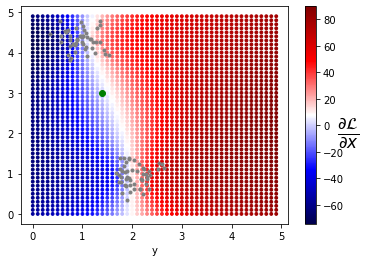

In [386]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(grads[:,0]), vmax=jnp.max(grads[:,0]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,0])),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label(r'$\frac{\partial \mathcal{L}}{\partial x}$',fontsize = 24,rotation = 0)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.xlabel('x')
plt.xlabel('y')

#_ = plt.title(r'$\frac{\partial \mathcal{L}}{\partial x}$',fontsize = 24)

plt.savefig('figs/dl_dx.png',dpi = 300)

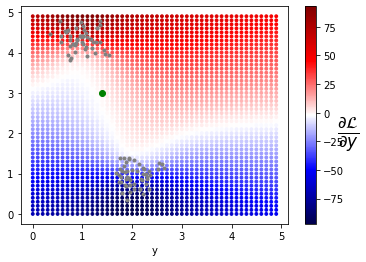

In [387]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(grads[:,1]), vmax=jnp.max(grads[:,1]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,1])),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label(r'$\frac{\partial \mathcal{L}}{\partial y}$',fontsize = 24,rotation = 0)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.xlabel('x')
plt.xlabel('y')

#_ = plt.title(r'$\frac{\partial \mathcal{L}}{\partial y}$',fontsize = 24)

plt.savefig('figs/dl_dy.png',dpi = 300)

In [334]:
totalGrad = grads[:,0] + grads[:,1]

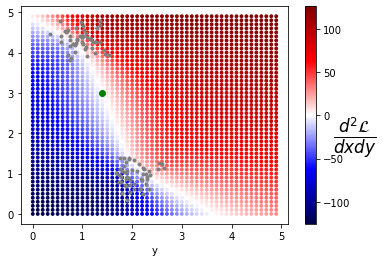

In [388]:
cmap = plt.cm.seismic
norm = colors.Normalize(vmin=jnp.min(totalGrad), vmax=jnp.max(totalGrad))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(totalGrad)),s = 8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)

cbar.set_label(r'$\frac{d^{2} \mathcal{L}}{dx dy}$',fontsize = 24,rotation = 0)

plt.plot(X[:,0],X[:,1],'.',color = 'grey')

plt.plot(minCentroid[0],minCentroid[1],'o',color = 'green')

plt.xlabel('x')
plt.xlabel('y')

#_ = plt.title(r'$\frac{d^{2} \mathcal{L}}{dx dy}$',fontsize = 24)

plt.savefig('figs/dl_dxy.png',dpi = 300)